# Task-5  Exploratory Data Analysis - Sports

### Perform EDA ON dataset 'Indian Premier League'

#### By Swati Singh

# Step 1: Importing Libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")


In [3]:

# Display the structure of the datasets
matches.info()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Step 2: Data Cleaning


In [4]:
# Fill missing values
matches['city'] = matches['city'].fillna('Dubai')

# Drop unnecessary columns
matches = matches.drop(columns=['umpire3'], axis=1)

# Confirm changes
matches.tail(1)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


# Step 3: Basic Descriptive Statistics

In [5]:
# General statistics about matches
print("Number of Matches Played:", matches.shape[0])
print("Number of Seasons Played:", matches['season'].nunique())
print("Most Winning Team:", matches['winner'].value_counts().idxmax())
print("Top 10 Players of the Match:\n", matches['player_of_match'].value_counts().head(10))


Number of Matches Played: 756
Number of Seasons Played: 12
Most Winning Team: Mumbai Indians
Top 10 Players of the Match:
 player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


# Step 4: Visualization

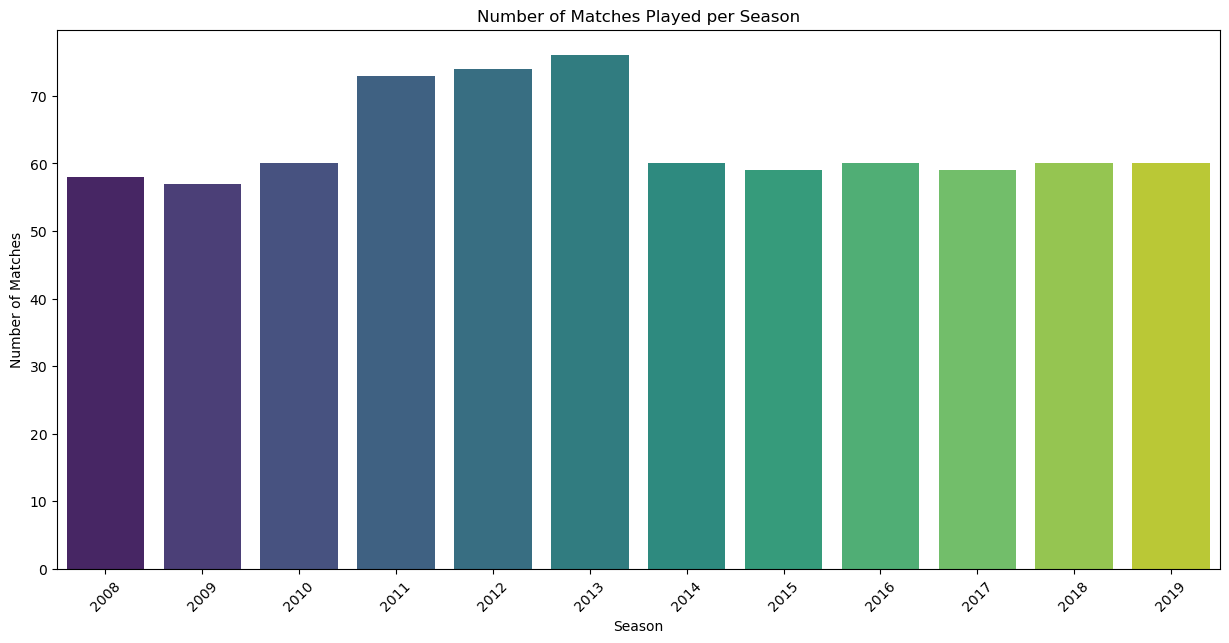

In [6]:
#Number of Matches Played per Season
plt.figure(figsize=(15, 7))
sns.countplot(data=matches, x='season', palette='viridis')
plt.title('Number of Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



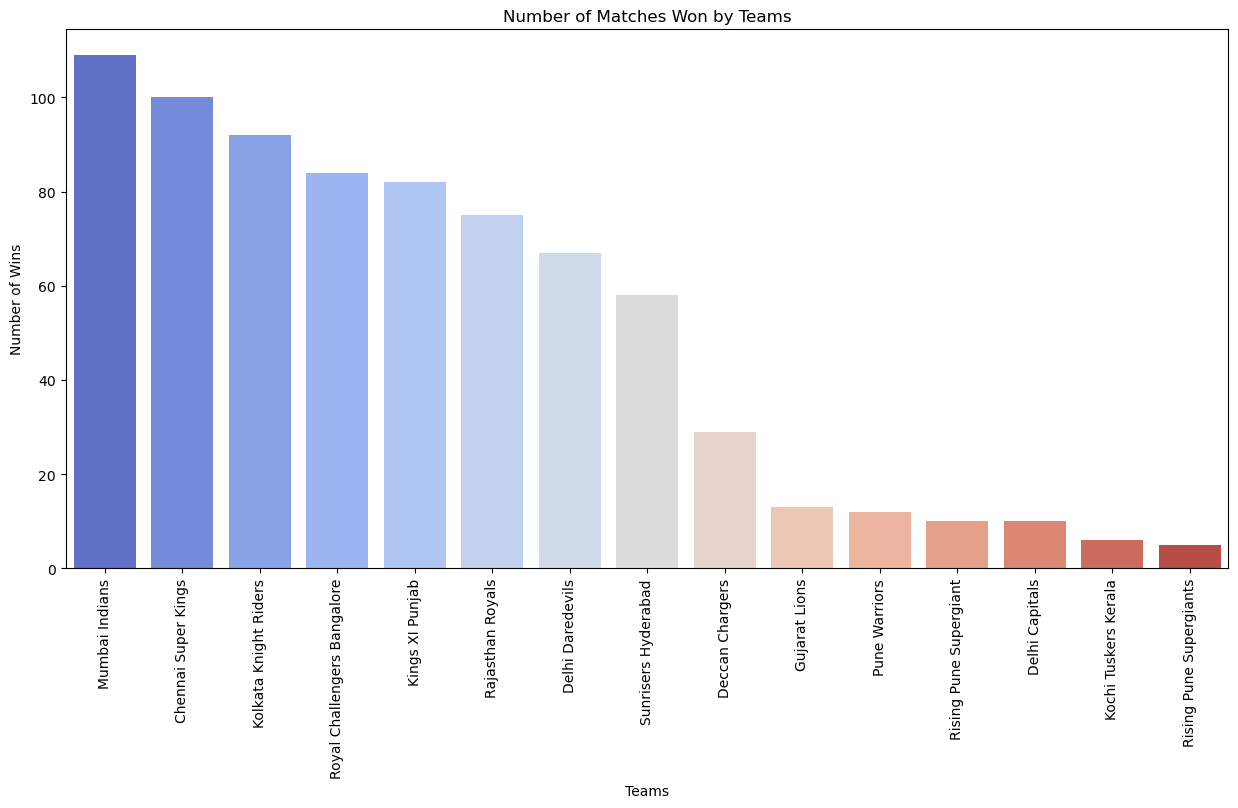

In [7]:
#Number of Matches Won by Teams
plt.figure(figsize=(15, 7))
sns.countplot(data=matches, x='winner', order=matches['winner'].value_counts().index, palette='coolwarm')
plt.title('Number of Matches Won by Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()


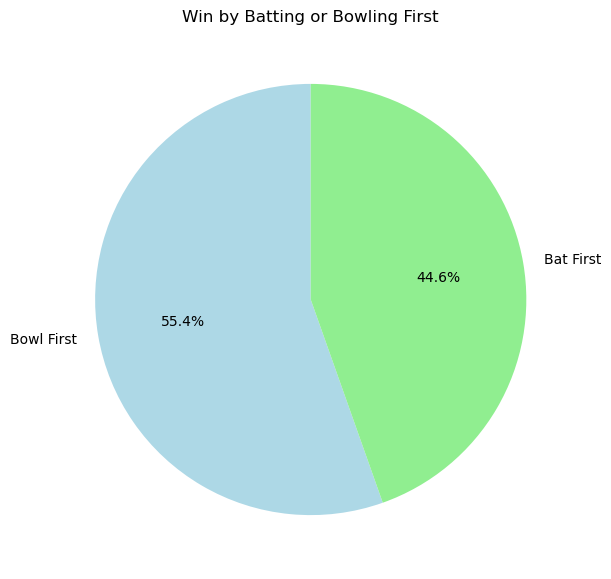

In [8]:
#Win by Batting or Bowling First
matches['win_by'] = np.where(matches['win_by_runs'] > 0, 'Bat First', 'Bowl First')
win_by_counts = matches['win_by'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(win_by_counts, labels=win_by_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Win by Batting or Bowling First')
plt.show()


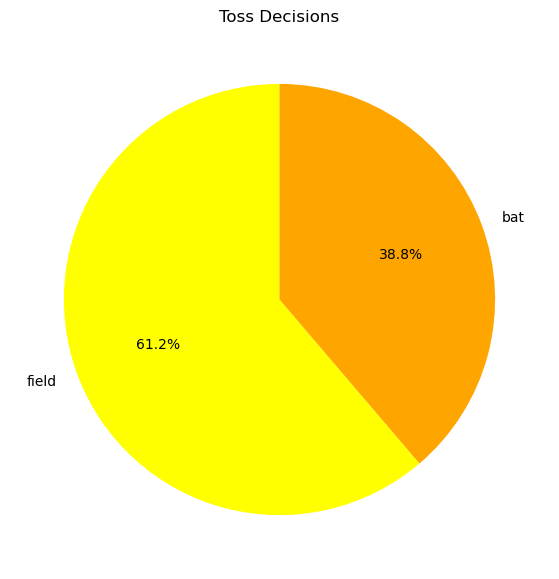

In [9]:
#Toss Decisions
toss_decisions = matches['toss_decision'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', colors=['yellow', 'orange'], startangle=90)
plt.title('Toss Decisions')
plt.show()


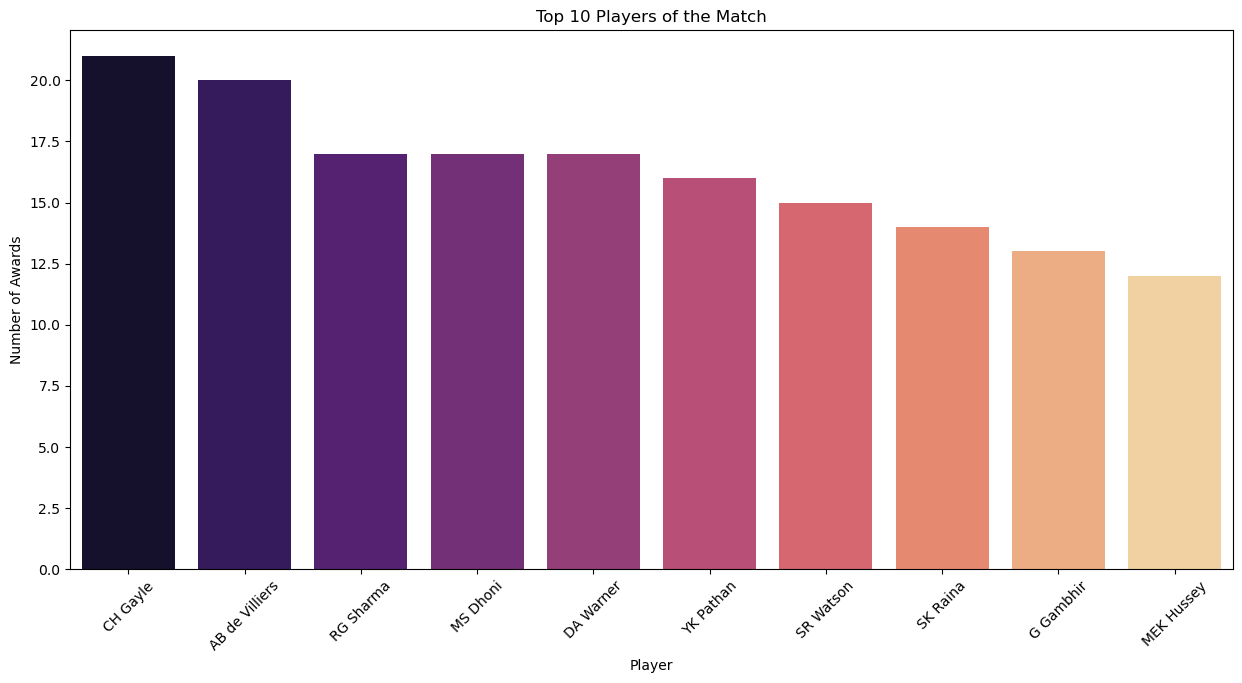

In [10]:
#Top Players of the Match
top_players = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=top_players.index, y=top_players.values, palette='magma')
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.show()


# Step 5: Analyzing Factors Influencing Wins

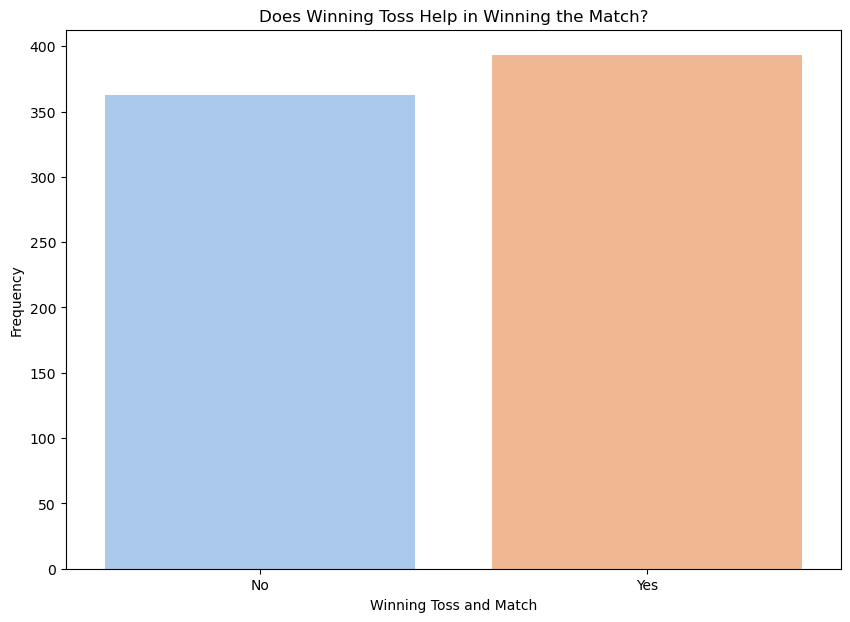

In [11]:
#Winning Toss and Winning Match
matches['toss_win_game_win'] = np.where(matches['toss_winner'] == matches['winner'], 'Yes', 'No')

plt.figure(figsize=(10, 7))
sns.countplot(data=matches, x='toss_win_game_win', palette='pastel')
plt.title('Does Winning Toss Help in Winning the Match?')
plt.xlabel('Winning Toss and Match')
plt.ylabel('Frequency')
plt.show()


# Step 6: In-depth Player Analysis


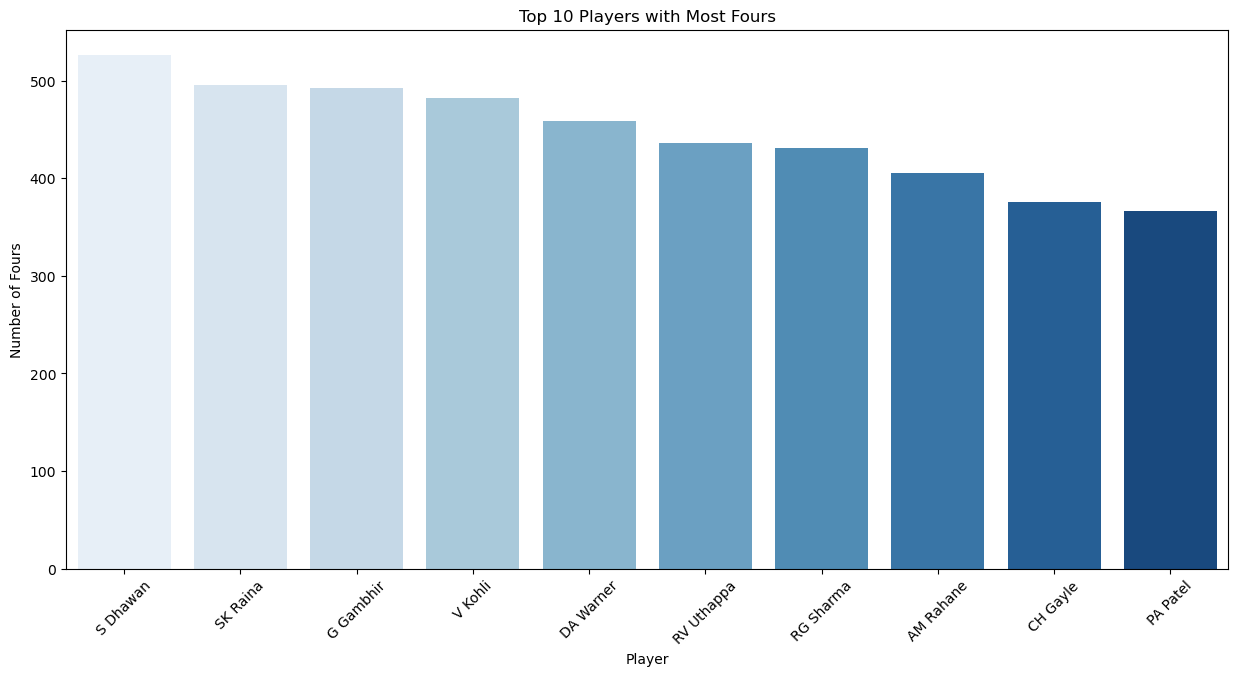

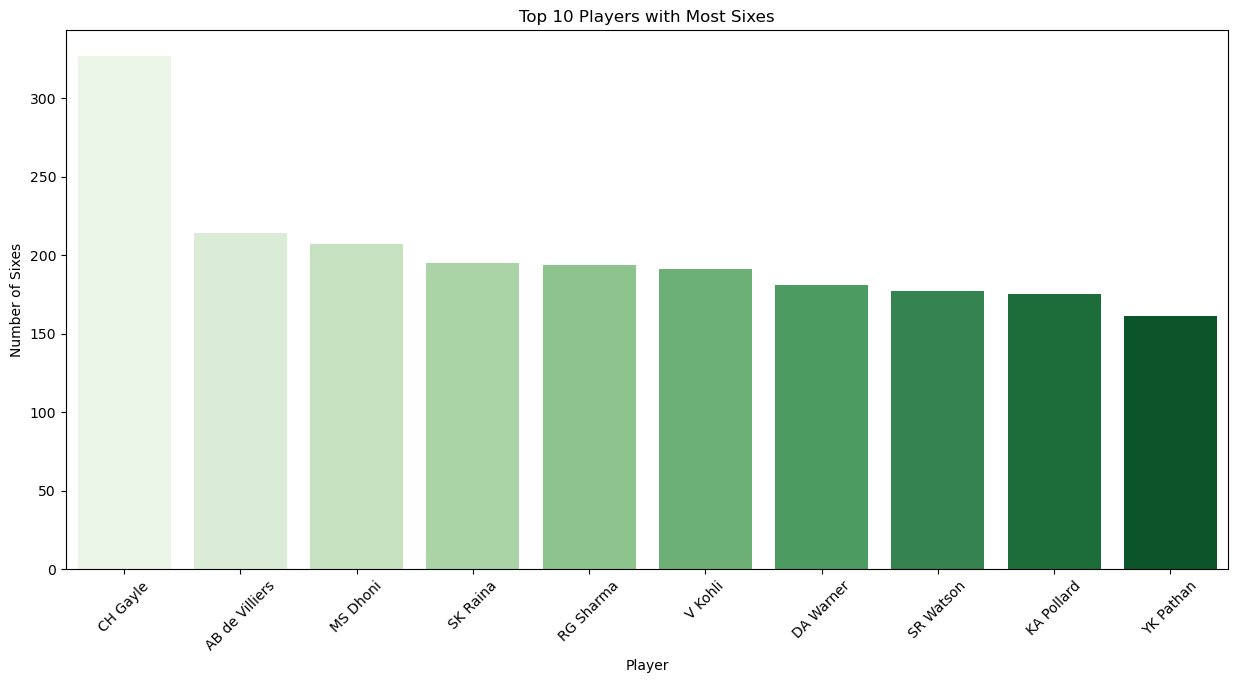

In [12]:
#Most Fours and Sixes by Players
# Fours
fours = deliveries[deliveries['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=fours.index, y=fours.values, palette='Blues')
plt.title('Top 10 Players with Most Fours')
plt.xlabel('Player')
plt.ylabel('Number of Fours')
plt.xticks(rotation=45)
plt.show()

# Sixes
sixes = deliveries[deliveries['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=sixes.index, y=sixes.values, palette='Greens')
plt.title('Top 10 Players with Most Sixes')
plt.xlabel('Player')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45)
plt.show()


# Step 7: Insights and Recommendations

In [13]:
#Key Observations
#Most Successful Teams: Mumbai Indians have won the most matches.
#Top Players: Chris Gayle, AB de Villiers, and Virat Kohli are among the top performers.
#Toss Advantage: Teams winning the toss and opting to field first tend to win more matches.
#Consistent Performers: Players like Suresh Raina and David Warner are consistently high scorers.

<!-- Recommendations for Endorsements
Top Batsmen: Virat Kohli, Chris Gayle, and AB de Villiers for their outstanding batting performances.
Top Bowlers: Lasith Malinga and Bhuvneshwar Kumar for their exceptional bowling skills.
Consistent All-Rounders: Players like Andre Russell and Shane Watson who contribute significantly in both batting and bowling. -->